#### TODO
- Future super stars in one table
- Continous integraion of latest data using https://github.com/swar/nba_api/blob/master/docs/examples/Finding%20Games.ipynb
- Create 3 categories only that will be used for predictions.
- Calculate TS% that will be used also for feature enginnering
- Usage Rate (USG%): This metric estimates the percentage of team plays used by a player while he is on the floor. It can be calculated using field goal attempts, free throw attempts, and turnovers in relation to the team's total attempts.

- Assist to Turnover Ratio: A simple yet effective metric showing a player's ball-handling efficiency. It's calculated by dividing the total number of assists by the number of turnovers.

- Rebounding Efficiency: This can be calculated as the total number of rebounds (offensive + defensive) divided by the minutes played. It helps in understanding a player's rebounding ability relative to their playing time.

- Shot Selection Profile: Using FG%, 3P%, and 2P%, you can analyze a player's shot selection tendencies and efficiency.

-Add a team dimension
-Add relative scores based on numbers of the team.
-Split and extract validation data that will not be used at all, to avoid data leakage in validation


Sources :    
https://www.kaggle.com/code/diegobormor/nba-2022-2023-data-overview/
https://www.kaggle.com/code/fahmisajid/player-position-classification/notebook


In [21]:
import pandas as pd
import numpy as np
from pathlib import Path

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
RAW_DATA_DIR = Path('..') / "data" / "raw"
CURATED_DATA_DIR = Path('..') / "data" / "curated"

In [3]:
filename = list(RAW_DATA_DIR.glob('*.csv'))[0]
print(f"Runnung on file: {filename}")
players = pd.read_csv(filename,sep =";", encoding='Windows-1252')

Runnung on file: ../data/raw/2023-2024 NBA Player Stats - Regular.csv


In [4]:
players.sort_values(by=['Player'], ascending=True)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
159,156,A.J. Green,SG,24,MIL,14,0,7.9,1.0,2.5,...,1.000,0.1,0.5,0.6,0.6,0.0,0.0,0.0,0.6,2.9
252,249,A.J. Lawson,SG,23,DAL,4,0,9.0,1.8,4.0,...,0.500,0.3,0.5,0.8,0.5,0.0,0.3,0.0,0.5,4.8
165,162,AJ Griffin,SF,20,ATL,11,0,9.2,0.9,3.0,...,1.000,0.2,0.7,0.9,0.3,0.1,0.0,0.4,0.5,2.7
155,152,Aaron Gordon,PF,28,DEN,19,19,33.1,5.3,10.9,...,0.491,2.6,4.5,7.1,3.6,1.1,0.8,1.6,1.8,12.5
193,190,Aaron Holiday,PG,27,HOU,17,1,18.5,2.9,5.7,...,0.750,0.2,1.8,2.0,2.1,0.5,0.1,0.5,1.9,7.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,92,Zach Collins,C,26,SAS,21,20,28.8,5.1,10.7,...,0.800,2.1,4.1,6.2,3.9,0.7,0.7,2.7,3.4,13.7
251,248,Zach LaVine,SG,28,CHI,18,18,35.3,7.3,16.6,...,0.866,0.3,4.6,4.9,3.4,0.9,0.2,2.0,2.1,21.0
331,326,Zeke Nnaji,PF,23,DEN,19,0,10.5,1.3,2.7,...,0.607,1.2,1.1,2.3,0.4,0.2,0.5,0.5,1.4,3.7
494,483,Ziaire Williams,SF,22,MEM,19,8,20.2,2.8,7.2,...,0.875,0.6,3.4,4.1,1.2,0.5,0.3,1.2,1.8,8.0


In [5]:
assert sum(players.isnull().sum()) == 0, "There are not null values in the dataset"


In [6]:
players["EFF"] = players.PTS + players.TRB + players.AST + players.STL + players.BLK - (players.FGA - players.FG) - (players.FTA - players.FT) - players.TOV

<Axes: xlabel='Pos', ylabel='EFF'>

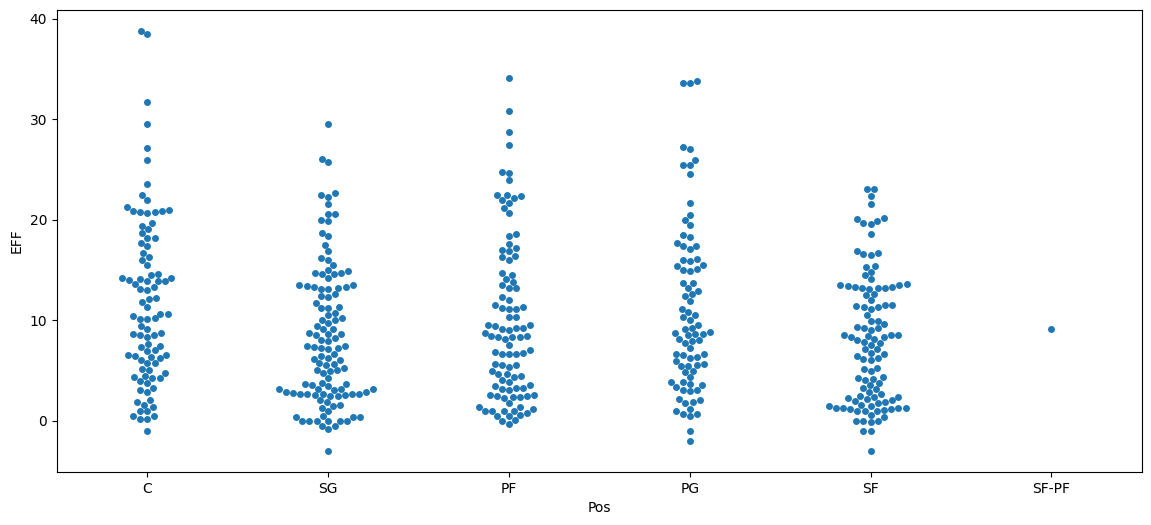

In [7]:
plt.figure(figsize=(14,6))
sns.swarmplot(
    x=players["Pos"],
    y=players["EFF"]
)

In [8]:
ages = players.Age.describe().round(decimals=1) # used to specify the first 25%, defining what is a young player
points = players.PTS.describe().round(decimals=1)

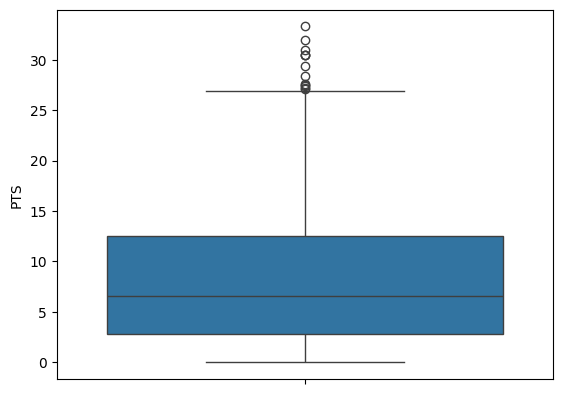

In [9]:
sns.boxplot(data=players, y="PTS");

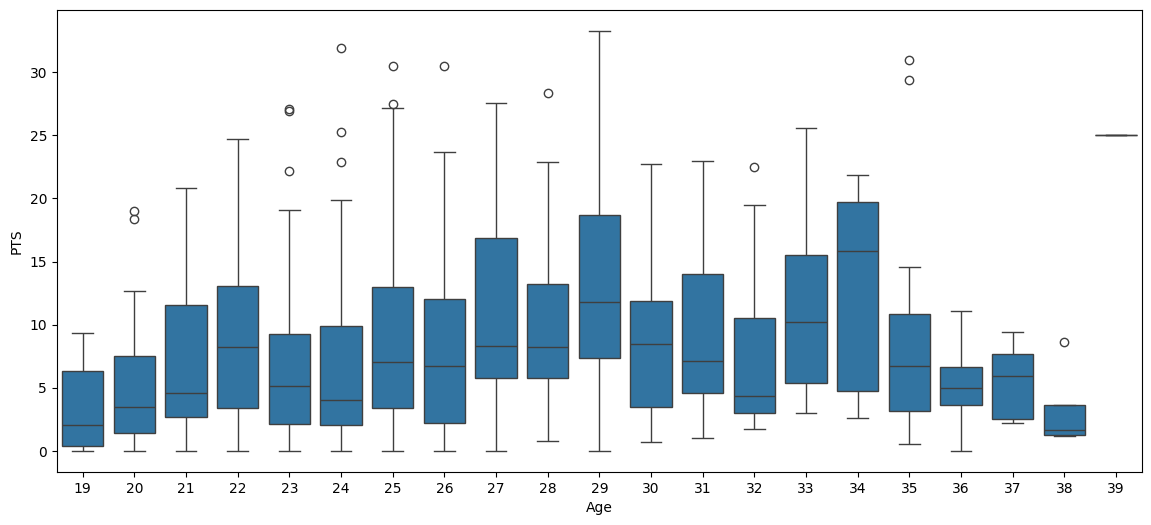

In [10]:
plt.figure(figsize=(14,6))
sns.boxplot(data=players, x="Age", y="PTS");

With the graph below, we can see that within <23y (what we have defined to be a young age), if we have more than 15 points we are special. Those data will then be used to filter the current base player and keep only special ones.

In [11]:
young_age = ages["25%"]
futur_super_star_def = f"(EFF >= 12) & (PTS >= 15) & (Age <= {young_age})"
players.query(futur_super_star_def).sort_values("EFF", ascending=False).sort_values(["Age", "EFF"], ascending=True)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,EFF
407,400,Shaedon Sharpe,SG,20,POR,21,20,37.0,6.4,15.0,...,1.5,4.3,5.8,3.5,1.0,0.4,2.9,3.0,18.4,16.9
476,465,Victor Wembanyama,PF,20,SAS,20,20,30.3,7.1,16.4,...,2.4,7.8,10.2,2.6,1.3,2.7,3.3,2.5,19.0,22.4
162,159,Jalen Green,SG,21,HOU,19,19,31.7,6.4,15.1,...,0.4,4.3,4.6,3.1,0.5,0.4,2.4,1.5,19.1,15.5
22,23,Paolo Banchero,PF,21,ORL,22,22,33.5,7.5,15.3,...,1.3,5.4,6.7,4.5,1.0,0.6,3.0,2.4,20.7,20.7
197,194,Chet Holmgren,C,21,OKC,21,21,30.0,6.0,11.7,...,1.7,6.1,7.8,2.5,0.9,2.4,2.0,2.9,17.1,22.5
402,395,Alperen Þengün,C,21,HOU,19,19,32.9,8.5,15.7,...,2.5,6.5,9.1,5.7,0.9,0.8,2.5,3.2,20.8,25.9
437,428,Cam Thomas,SG,22,BRK,12,10,31.5,8.9,19.8,...,0.2,3.3,3.5,2.3,0.7,0.6,1.7,2.0,23.7,17.5
102,99,Cade Cunningham,PG,22,DET,22,22,34.9,8.1,19.4,...,0.5,3.3,3.8,7.3,1.0,0.2,4.3,2.7,22.0,18.3
486,475,Jalen Williams,PF,22,OKC,18,18,33.1,6.7,13.0,...,0.3,3.9,4.2,3.7,0.9,0.3,1.8,3.0,17.9,18.4
463,452,Franz Wagner,SF,22,ORL,22,22,33.1,7.6,16.5,...,1.2,4.4,5.6,3.7,1.1,0.4,1.7,2.0,20.7,20.2


### Age and more

<Axes: xlabel='count', ylabel='Pos'>

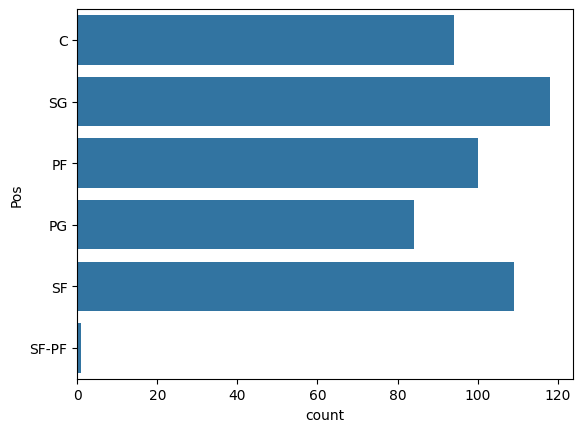

In [12]:
sns.countplot(players['Pos'],label="Count")

In [17]:
players

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,EFF
0,1,Precious Achiuwa,C,24,TOR,16,0,18.1,3.3,7.0,...,2.3,3.9,6.2,1.9,0.6,0.4,1.4,1.8,8.0,11.3
1,2,Bam Adebayo,C,26,MIA,16,16,33.6,8.3,15.8,...,2.1,7.9,9.9,3.9,1.2,1.0,2.4,2.4,22.3,27.1
2,3,Ochai Agbaji,SG,23,UTA,22,9,20.4,2.4,5.2,...,0.8,1.7,2.5,1.0,0.6,0.5,0.7,1.5,6.4,7.4
3,4,Santi Aldama,PF,23,MEM,15,4,26.9,5.1,11.7,...,1.7,4.6,6.3,2.3,0.7,0.7,1.1,1.7,13.1,14.7
4,5,Nickeil Alexander-Walker,SG,25,MIN,21,10,23.9,2.6,6.4,...,0.5,1.7,2.1,2.5,0.9,0.7,1.1,1.9,7.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,490,Thaddeus Young,PF,35,TOR,3,0,3.3,0.7,1.3,...,0.3,0.7,1.0,1.0,0.0,0.0,0.3,0.0,1.3,1.7
502,491,Trae Young,PG,25,ATL,19,19,36.1,8.3,20.1,...,0.7,2.1,2.8,10.6,1.5,0.1,3.8,1.5,27.2,25.4
503,492,Omer Yurtseven,C,25,UTA,15,6,12.7,2.1,3.9,...,1.6,3.4,5.0,0.8,0.2,0.5,0.9,1.7,4.9,8.6
504,493,Cody Zeller,C,31,NOP,19,0,9.7,0.5,1.7,...,1.2,1.8,3.0,1.0,0.2,0.1,0.3,1.2,1.7,3.9


### True Shot percentage

In [24]:
players['TS%'] = np.where((2 * (players['FGA'] + 0.44 * players['FTA'])) != 0, players['PTS'] / (2 * (players['FGA'] + 0.44 * players['FTA'])), 0)

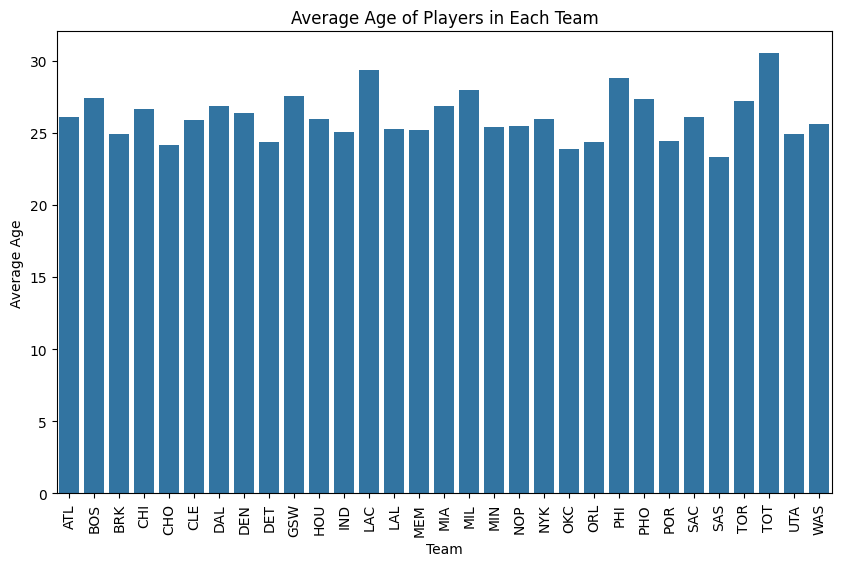

In [28]:
average_age_per_team = players.groupby('Tm')['Age'].mean()
plt.figure(figsize=(10,6))
sns.barplot(x=average_age_per_team.index, y=average_age_per_team.values)
plt.title('Average Age of Players in Each Team')
plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Average Age')
plt.show()

In [37]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [38]:

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF']),
        ('cat', OneHotEncoder(), ['Pos', 'Tm'])
    ])
# Define model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])


In [39]:
# Split data into training and test sets
X = players.drop(['Player', 'PTS', 'FG%'], axis=1)
y_pts = players['PTS']
y_fg = players['FG%']
X_train_pts, X_test_pts, y_train_pts, y_test_pts = train_test_split(X, y_pts, test_size=0.2, random_state=42)
X_train_fg, X_test_fg, y_train_fg, y_test_fg = train_test_split(X, y_fg, test_size=0.2, random_state=42)


In [40]:
# Train model to predict PTS
model.fit(X_train_pts, y_train_pts)
pts_preds = model.predict(X_test_pts)
print(f'RMSE for PTS prediction: {mean_squared_error(y_test_pts, pts_preds, squared=False)}')


RMSE for PTS prediction: 0.8718040063513112


In [41]:

# Train model to predict FG%
model.fit(X_train_fg, y_train_fg)
fg_preds = model.predict(X_test_fg)
print(f'RMSE for FG% prediction: {mean_squared_error(y_test_fg, fg_preds, squared=False)}')

RMSE for FG% prediction: 0.05260435558459574
